In [2]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
start = datetime.datetime(2010, 12, 31)
end = datetime.datetime(2013, 12, 31)
ibmg = web.DataReader("IBM", 'yahoo', start, end)[['Close']]
ibmg.columns = ['IBM.Close']
ibmg['IBM.DailyReturn'] = ibmg['IBM.Close'].pct_change()+1
ibmg['IBM.CumReturn'] = ibmg['IBM.DailyReturn'].cumprod()-1
amzng = web.DataReader("AMZN", 'yahoo', start, end)[['Close']]
amzng.columns = ['AMZN.Close']
amzng['AMZN.DailyReturn'] = amzng['AMZN.Close'].pct_change()+1
amzng['AMZN.CumReturn'] = amzng['AMZN.DailyReturn'].cumprod()-1
gspcg = web.DataReader("^GSPC", 'yahoo', start, end)[['Close']]
gspcg.columns = ['GSPC.Close']
gspcg['GSPC.DailyReturn'] = gspcg['GSPC.Close'].pct_change()+1
gspcg['GSPC.CumReturn'] = gspcg['GSPC.DailyReturn'].cumprod()-1
groupreturns = pd.concat([ibmg,amzng,gspcg], axis=1, join='outer',)
groupreturns[['AMZN.CumReturn','IBM.CumReturn','GSPC.CumReturn']].tail(1)

,AMZN.CumReturn,IBM.CumReturn,GSPC.CumReturn
Date,,,
2013-12-31,1.2155,0.278073,0.469705


In [3]:
amazon_weight = 0.5
ibm_weight = 0.3
gspc_weight = 0.2
print "Portfolio Return: ", \
    str(round(
        (groupreturns['AMZN.CumReturn'][-1]*amazon_weight + \
    groupreturns['IBM.CumReturn'][-1]*ibm_weight + \
    groupreturns['GSPC.CumReturn'][-1]*gspc_weight)*100
        ,2)
    )+"%"

Portfolio Return:  78.51%


The value differs to the one in the book. This is due to Yahoo's data being unavailable and a different value for IBM return, which will need to be investigated further.

In [4]:
import numpy as np
portfolio_weights = np.array([0.5,0.3,0.2])
portfolio_returns = np.array([groupreturns['AMZN.CumReturn'][-1],\
                              groupreturns['IBM.CumReturn'][-1],\
                                groupreturns['GSPC.CumReturn'][-1]])

print round(np.dot(portfolio_weights,portfolio_returns.T)*100,2)

78.51


Matrix multiplication using Numpy array results in the same value for the total portfolio return.

In [34]:
ibmg2 = web.DataReader("IBM", 'yahoo', start, end)[['Close']]
ibmg2.columns = ['IBM.Close']
amzng2 = web.DataReader("AMZN", 'yahoo', start, end)[['Close']]
amzng2.columns = ['AMZN.Close']
gspcg2 = web.DataReader("^GSPC", 'yahoo', start, end)[['Close']]
gspcg2.columns = ['GSPC.Close']
groupreturns2 = pd.concat([ibmg2,amzng2,gspcg2], axis=1, join='outer')['2012-12-31':'2013']
groupreturns2['IBM.DailyReturn'] = groupreturns2['IBM.Close'].pct_change()+1
groupreturns2['IBM.CumReturn'] = groupreturns2['IBM.DailyReturn'].cumprod()
groupreturns2['AMZN.DailyReturn'] = groupreturns2['AMZN.Close'].pct_change()+1
groupreturns2['AMZN.CumReturn'] = groupreturns2['AMZN.DailyReturn'].cumprod()
groupreturns2['GSPC.DailyReturn'] = groupreturns2['GSPC.Close'].pct_change()+1
groupreturns2['GSPC.CumReturn'] = groupreturns2['GSPC.DailyReturn'].cumprod()

equal_weighted_returns = groupreturns2.fillna(1)

equal_weighted_returns.head()

,IBM.Close,AMZN.Close,GSPC.Close,IBM.DailyReturn,IBM.CumReturn,AMZN.DailyReturn,AMZN.CumReturn,GSPC.DailyReturn,GSPC.CumReturn
Date,,,,,,,,,
2012-12-31,191.550003,250.869995,1426.189941,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2013-01-02,196.350006,257.309998,1462.420044,1.025059,1.025059,1.025671,1.025671,1.025403,1.025403
2013-01-03,195.270004,258.480011,1459.369995,0.994500,1.019421,1.004547,1.030335,0.997914,1.023265
2013-01-04,193.990005,259.149994,1466.469971,0.993445,1.012738,1.002592,1.033005,1.004865,1.028243
2013-01-07,193.139999,268.459991,1461.890015,0.995618,1.008301,1.035925,1.070116,0.996877,1.025032


In [69]:
equal_weighted_returns['AMZN.idx'] = equal_weighted_returns['IBM.idx'] = equal_weighted_returns['GSPC.idx'] = None
equal_weighted_returns['AMZN.idx']['2012-12-31':'2013-03-28'] = equal_weighted_returns['AMZN.CumReturn']['2012-12-31':'2013-03-28']/3
equal_weighted_returns['IBM.idx']['2012-12-31':'2013-03-28'] = equal_weighted_returns['IBM.CumReturn']['2012-12-31':'2013-03-28']/3
equal_weighted_returns['GSPC.idx']['2012-12-31':'2013-03-28'] = equal_weighted_returns['GSPC.CumReturn']['2012-12-31':'2013-03-28']/3

q1return = equal_weighted_returns[['AMZN.idx','IBM.idx','GSPC.idx']]['2013-03-28':'2013-03-28'].sum().sum()

/Users/dsr/Documents/HustleProjects/financethroughpython/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/dsr/Documents/HustleProjects/financethroughpython/venv/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dsr/Documents/HustleProjects/financethroughpython/venv/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://panda

In [70]:
equal_weighted_returns['2012-12-31':'2013-04-03'].tail()

,IBM.Close,AMZN.Close,GSPC.Close,IBM.DailyReturn,IBM.CumReturn,AMZN.DailyReturn,AMZN.CumReturn,GSPC.DailyReturn,GSPC.CumReturn,AMZN.idx,IBM.idx,GSPC.idx,portfolio_return
Date,,,,,,,,,,,,,
2013-03-27,210.889999,265.299988,1562.849976,0.993078,1.100966,1.019169,1.057520,0.999412,1.095822,0.352507,0.366989,0.365274,1.08477
2013-03-28,213.300003,266.489990,1569.189941,1.011428,1.113547,1.004485,1.062263,1.004057,1.100267,0.354088,0.371182,0.366756,1.09203
2013-04-01,212.380005,261.609985,1562.170044,0.995687,0.995687,0.981688,0.981688,0.995526,0.995526,None,None,None,1.08216
2013-04-02,214.360001,263.320007,1570.250000,1.009323,1.004970,1.006537,0.988105,1.005172,1.000676,None,None,None,1.08975
2013-04-03,212.660004,259.029999,1553.689941,0.992069,0.997000,0.983708,0.972006,0.989454,0.990122,None,None,None,1.07715


In [71]:
equal_weighted_returns['IBM.CumReturn']['2013-04-01':'2013-06-28'] = equal_weighted_returns['IBM.DailyReturn']['2013-04-01':'2013-06-28'].cumprod()
equal_weighted_returns['AMZN.CumReturn']['2013-04-01':'2013-06-28'] = equal_weighted_returns['AMZN.DailyReturn']['2013-04-01':'2013-06-28'].cumprod()
equal_weighted_returns['GSPC.CumReturn']['2013-04-01':'2013-06-28'] = equal_weighted_returns['GSPC.DailyReturn']['2013-04-01':'2013-06-28'].cumprod()

equal_weighted_returns['AMZN.idx']['2013-04-01':'2013-06-28'] = q1return*equal_weighted_returns['AMZN.CumReturn']['2013-04-01':'2013-06-28']/3
equal_weighted_returns['IBM.idx']['2013-04-01':'2013-06-28'] = q1return*equal_weighted_returns['IBM.CumReturn']['2013-04-01':'2013-06-28']/3
equal_weighted_returns['GSPC.idx']['2013-04-01':'2013-06-28'] = q1return*equal_weighted_returns['GSPC.CumReturn']['2013-04-01':'2013-06-28']/3

q2return = equal_weighted_returns[['AMZN.idx','IBM.idx','GSPC.idx']]['2013-06-28':'2013-06-28'].sum().sum()

equal_weighted_returns['2013-04-01':'2013-06-28'].head()

/Users/dsr/Documents/HustleProjects/financethroughpython/venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/dsr/Documents/HustleProjects/financethroughpython/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/dsr/Documents/HustleProjects/financethroughpython/venv/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

,IBM.Close,AMZN.Close,GSPC.Close,IBM.DailyReturn,IBM.CumReturn,AMZN.DailyReturn,AMZN.CumReturn,GSPC.DailyReturn,GSPC.CumReturn,AMZN.idx,IBM.idx,GSPC.idx,portfolio_return
Date,,,,,,,,,,,,,
2013-04-01,212.380005,261.609985,1562.170044,0.995687,0.995687,0.981688,0.981688,0.995526,0.995526,0.357343,0.362439,0.36238,1.08216
2013-04-02,214.360001,263.320007,1570.250000,1.009323,1.004970,1.006537,0.988105,1.005172,1.000676,0.359679,0.365818,0.364255,1.08975
2013-04-03,212.660004,259.029999,1553.689941,0.992069,0.997000,0.983708,0.972006,0.989454,0.990122,0.353819,0.362916,0.360413,1.07715
2013-04-04,211.309998,259.079987,1559.979980,0.993652,0.990670,1.000193,0.972194,1.004048,0.994131,0.353887,0.360613,0.361872,1.07637
2013-04-05,209.410004,255.479996,1553.280029,0.991008,0.981763,0.986105,0.958685,0.995705,0.989861,0.34897,0.35737,0.360318,1.06666


In [72]:
equal_weighted_returns['IBM.CumReturn']['2013-07-01':'2013-09-30'] = equal_weighted_returns['IBM.DailyReturn']['2013-07-01':'2013-09-30'].cumprod()
equal_weighted_returns['AMZN.CumReturn']['2013-07-01':'2013-09-30'] = equal_weighted_returns['AMZN.DailyReturn']['2013-07-01':'2013-09-30'].cumprod()
equal_weighted_returns['GSPC.CumReturn']['2013-07-01':'2013-09-30'] = equal_weighted_returns['GSPC.DailyReturn']['2013-07-01':'2013-09-30'].cumprod()

equal_weighted_returns['AMZN.idx']['2013-07-01':'2013-09-30'] = q2return * equal_weighted_returns['AMZN.CumReturn']['2013-07-01':'2013-09-30']/3
equal_weighted_returns['IBM.idx']['2013-07-01':'2013-09-30'] = q2return * equal_weighted_returns['IBM.CumReturn']['2013-07-01':'2013-09-30']/3
equal_weighted_returns['GSPC.idx']['2013-07-01':'2013-09-30'] = q2return * equal_weighted_returns['GSPC.CumReturn']['2013-07-01':'2013-09-30']/3

q3return = equal_weighted_returns[['AMZN.idx','IBM.idx','GSPC.idx']]['2013-09-30':'2013-09-30'].sum().sum()

equal_weighted_returns['2013-07-01':'2013-09-30'].head()

/Users/dsr/Documents/HustleProjects/financethroughpython/venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/dsr/Documents/HustleProjects/financethroughpython/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/dsr/Documents/HustleProjects/financethroughpython/venv/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

,IBM.Close,AMZN.Close,GSPC.Close,IBM.DailyReturn,IBM.CumReturn,AMZN.DailyReturn,AMZN.CumReturn,GSPC.DailyReturn,GSPC.CumReturn,AMZN.idx,IBM.idx,GSPC.idx,portfolio_return
Date,,,,,,,,,,,,,
2013-07-01,191.279999,282.100006,1614.959961,1.000890,1.000890,1.015881,1.015881,1.005404,1.005404,0.36506,0.359673,0.361295,69.9451
2013-07-02,191.500000,283.730011,1614.079956,1.001150,1.002041,1.005778,1.021751,0.999455,1.004856,0.36717,0.360087,0.361098,70.0949
2013-07-03,193.250000,284.029999,1615.410034,1.009138,1.011198,1.001057,1.022831,1.000824,1.005684,0.367558,0.363377,0.361396,70.351
2013-07-05,194.929993,285.880005,1631.890015,1.008693,1.019988,1.006513,1.029493,1.010202,1.015944,0.369952,0.366536,0.365083,70.9461
2013-07-08,194.979996,290.589996,1640.459961,1.000257,1.020250,1.016475,1.046455,1.005252,1.021279,0.376047,0.36663,0.367,71.4682


In [73]:
equal_weighted_returns['IBM.CumReturn']['2013-10-01':'2013-12-31'] = equal_weighted_returns['IBM.DailyReturn']['2013-10-01':'2013-12-31'].cumprod()
equal_weighted_returns['AMZN.CumReturn']['2013-10-01':'2013-12-31'] = equal_weighted_returns['AMZN.DailyReturn']['2013-10-01':'2013-12-31'].cumprod()
equal_weighted_returns['GSPC.CumReturn']['2013-10-01':'2013-12-31'] = equal_weighted_returns['GSPC.DailyReturn']['2013-10-01':'2013-12-31'].cumprod()

equal_weighted_returns['AMZN.idx']['2013-10-01':'2013-12-31'] = q3return * equal_weighted_returns['AMZN.CumReturn']['2013-10-01':'2013-12-31']/3
equal_weighted_returns['IBM.idx']['2013-10-01':'2013-12-31'] = q3return * equal_weighted_returns['IBM.CumReturn']['2013-10-01':'2013-12-31']/3
equal_weighted_returns['GSPC.idx']['2013-10-01':'2013-12-31'] = q3return * equal_weighted_returns['GSPC.CumReturn']['2013-10-01':'2013-12-31']/3

equal_weighted_returns['2013-10-01':'2013-12-31'].head()

/Users/dsr/Documents/HustleProjects/financethroughpython/venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/dsr/Documents/HustleProjects/financethroughpython/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/dsr/Documents/HustleProjects/financethroughpython/venv/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

,IBM.Close,AMZN.Close,GSPC.Close,IBM.DailyReturn,IBM.CumReturn,AMZN.DailyReturn,AMZN.CumReturn,GSPC.DailyReturn,GSPC.CumReturn,AMZN.idx,IBM.idx,GSPC.idx,portfolio_return
Date,,,,,,,,,,,,,
2013-10-01,186.380005,320.950012,1695.000000,1.006480,1.006480,1.026580,1.026580,1.007999,1.007999,0.386328,0.378764,0.379336,4671.17
2013-10-02,184.960007,320.510010,1693.869995,0.992381,0.998812,0.998629,1.025173,0.999333,1.007327,0.385799,0.375879,0.379083,4656.2
2013-10-03,183.860001,314.760010,1678.660034,0.994053,0.992872,0.982060,1.006781,0.991021,0.998281,0.378877,0.373643,0.375679,4604.93
2013-10-04,184.100006,319.040009,1690.500000,1.001305,0.994168,1.013598,1.020471,1.007053,1.005322,0.384029,0.374131,0.378329,4638.76
2013-10-07,182.009995,310.029999,1676.119995,0.988647,0.982882,0.971759,0.991652,0.991494,0.996771,0.373184,0.369883,0.37511,4564.02


In [74]:
equal_weighted_returns['portfolio_return'] = equal_weighted_returns['AMZN.idx'] + equal_weighted_returns['IBM.idx'] + equal_weighted_returns['GSPC.idx']

In [75]:
equal_weighted_returns['2013-09-28':'2013-12-31'].head()

,IBM.Close,AMZN.Close,GSPC.Close,IBM.DailyReturn,IBM.CumReturn,AMZN.DailyReturn,AMZN.CumReturn,GSPC.DailyReturn,GSPC.CumReturn,AMZN.idx,IBM.idx,GSPC.idx,portfolio_return
Date,,,,,,,,,,,,,
2013-09-30,185.179993,312.640015,1681.550049,0.990691,0.968971,0.989336,1.125860,0.993971,1.046860,0.404581,0.348203,0.376193,1.12898
2013-10-01,186.380005,320.950012,1695.000000,1.006480,1.006480,1.026580,1.026580,1.007999,1.007999,0.386328,0.378764,0.379336,1.14443
2013-10-02,184.960007,320.510010,1693.869995,0.992381,0.998812,0.998629,1.025173,0.999333,1.007327,0.385799,0.375879,0.379083,1.14076
2013-10-03,183.860001,314.760010,1678.660034,0.994053,0.992872,0.982060,1.006781,0.991021,0.998281,0.378877,0.373643,0.375679,1.1282
2013-10-04,184.100006,319.040009,1690.500000,1.001305,0.994168,1.013598,1.020471,1.007053,1.005322,0.384029,0.374131,0.378329,1.13649


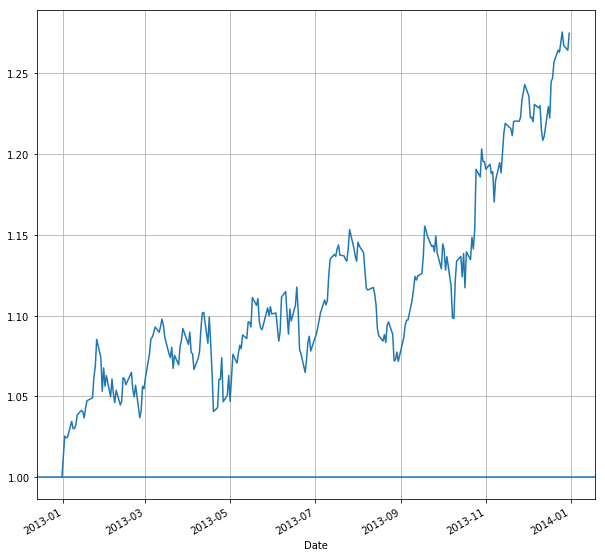

In [77]:
equal_weighted_returns['portfolio_return'].plot(figsize=(10,10), grid=True).axhline(1)

Assuming all the calculations were done correctly, the performance of equally weighted portfolio is shown above. Some patterns are similar to the ones in Figure 3.2 on page 111.

<div style='color:red'>Unable to implement Value Weighted Portfolio calculations due to a lack of oustanding shares values (pages 93 - 113)</div>